In [2]:
#Load the dataset and identify the relevant columns.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("CarPrice_Assignment.csv")
X = dataset.iloc[:, 16:17].values
y= dataset.iloc[:, 25:].values

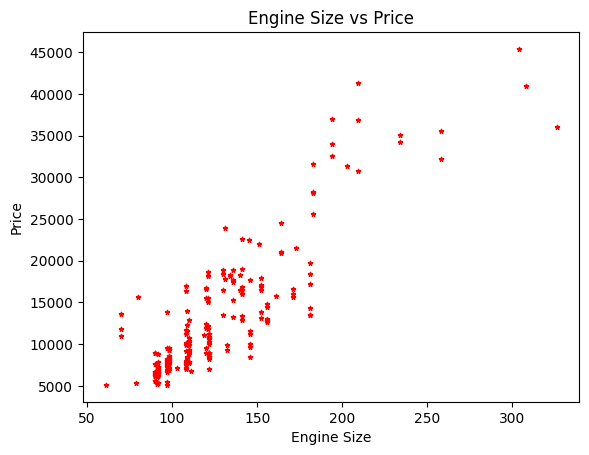

In [3]:
#Visualize the relationship between engine size and price.
plt.scatter(X, y, color='red',s=10,marker='*')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [4]:
#Build a predictive model to estimate car price based on engine size.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
#print(X_poly)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
k1=y_pred.copy()


In [5]:
#Predict the price for a car with: Engine size = 200
engine_size = np.array([[200]])
engine_size_poly = poly_reg.transform(engine_size)
predicted_price = lin_reg.predict(engine_size_poly)
print(f"The predicted price for a car with engine size 200 is: {predicted_price}")



The predicted price for a car with engine size 200 is: [[28207.4516369]]


C:\Users\hares\AppData\Local\Temp\ipykernel_33608\625066917.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


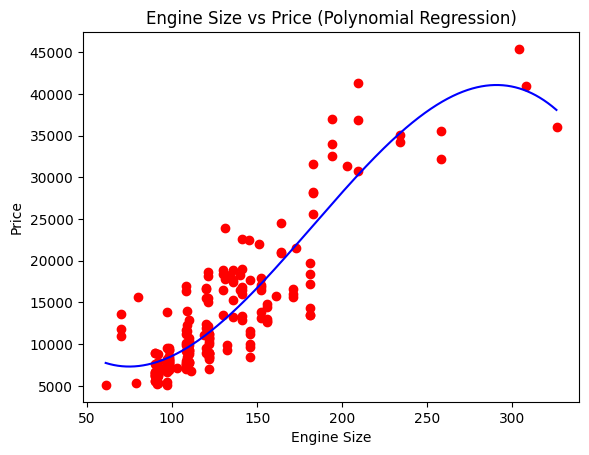

In [6]:
#real values vs predicted values
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Engine Size vs Price (Polynomial Regression)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

C:\Users\hares\AppData\Local\Temp\ipykernel_33608\630276900.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


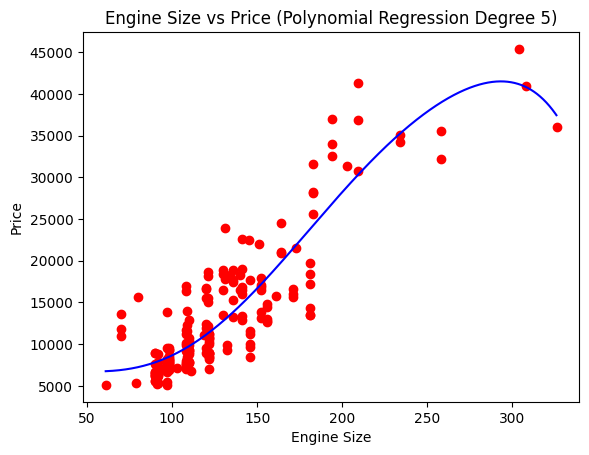

In [7]:
#Increase the flexibility of your model and observe how the curve changes.
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
k=lin_reg.predict(poly_reg.fit_transform(X_grid))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid,k, color = 'blue')
plt.title('Engine Size vs Price (Polynomial Regression Degree 5)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

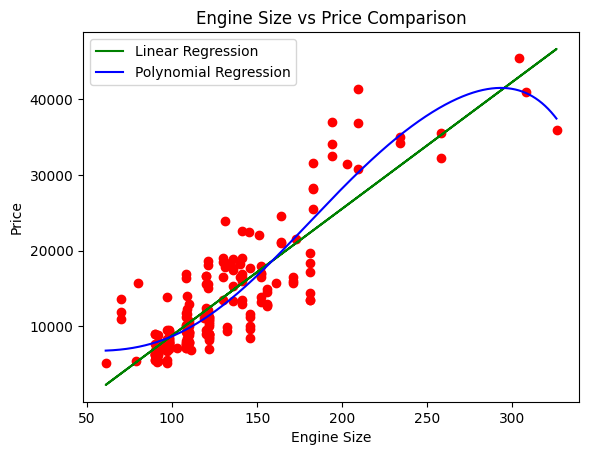

In [8]:
#Compare predictions from:a simple straight-line modela curved model
#Simple Linear Regression
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X, y)
y_pred_simple = lin_reg_simple.predict(X)
#Plotting both models
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_simple, color='green', label='Linear Regression')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue', label='Polynomial Regression')
plt.title('Engine Size vs Price Comparison')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
#Analyze which model: captures the trend better or gives more realistic predictions
from sklearn.metrics import mean_squared_error, r2_score
mse_simple = mean_squared_error(y, y_pred_simple)
mse_poly = mean_squared_error(y, y_pred)
r2_simple = r2_score(y, y_pred_simple)
r2_poly = r2_score(y, y_pred)
print(f"Simple Linear Regression - MSE: {mse_simple}, R2: {r2_simple}")
print(f"Polynomial Regression - MSE: {mse_poly}, R2: {r2_poly}")


Simple Linear Regression - MSE: 14980261.40555132, R2: 0.7641291357806176
Polynomial Regression - MSE: 13124650.263856068, R2: 0.7933465567452864


In [10]:
#co realtion value for every numerical  feature with target variable
x1 = dataset.iloc[:1:24].values
y1= dataset.iloc[:, 25:].values
for i in range(len(x1[0])):

    #if feature is numnerical then co relation
    if (isinstance(x1[0][i], int) or isinstance(x1[0][i], float)):
        corr = dataset.iloc[:, i].corr(dataset.iloc[:, 25])
        print(f"Correlation between {dataset.columns[i]} and Price: {corr}")







Correlation between car_ID and Price: -0.10909333948229955
Correlation between symboling and Price: -0.07997822464270347
Correlation between wheelbase and Price: 0.5778155982921496
Correlation between carlength and Price: 0.6829200156779629
Correlation between carwidth and Price: 0.7593252997415118
Correlation between carheight and Price: 0.11933622657049436
Correlation between curbweight and Price: 0.8353048793372965
Correlation between enginesize and Price: 0.8741448025245112
Correlation between boreratio and Price: 0.5531732367984434
Correlation between stroke and Price: 0.079443083881931
Correlation between compressionratio and Price: 0.06798350579944265
Correlation between horsepower and Price: 0.8081388225362212
Correlation between peakrpm and Price: -0.08526715027785685
Correlation between citympg and Price: -0.6857513360270401
Correlation between highwaympg and Price: -0.6975990916465566
Correlation between price and Price: 1.0


In [11]:
numerical_features = dataset.select_dtypes(include=[np.number])
print(numerical_features.columns)
print(len(numerical_features.columns))

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
16


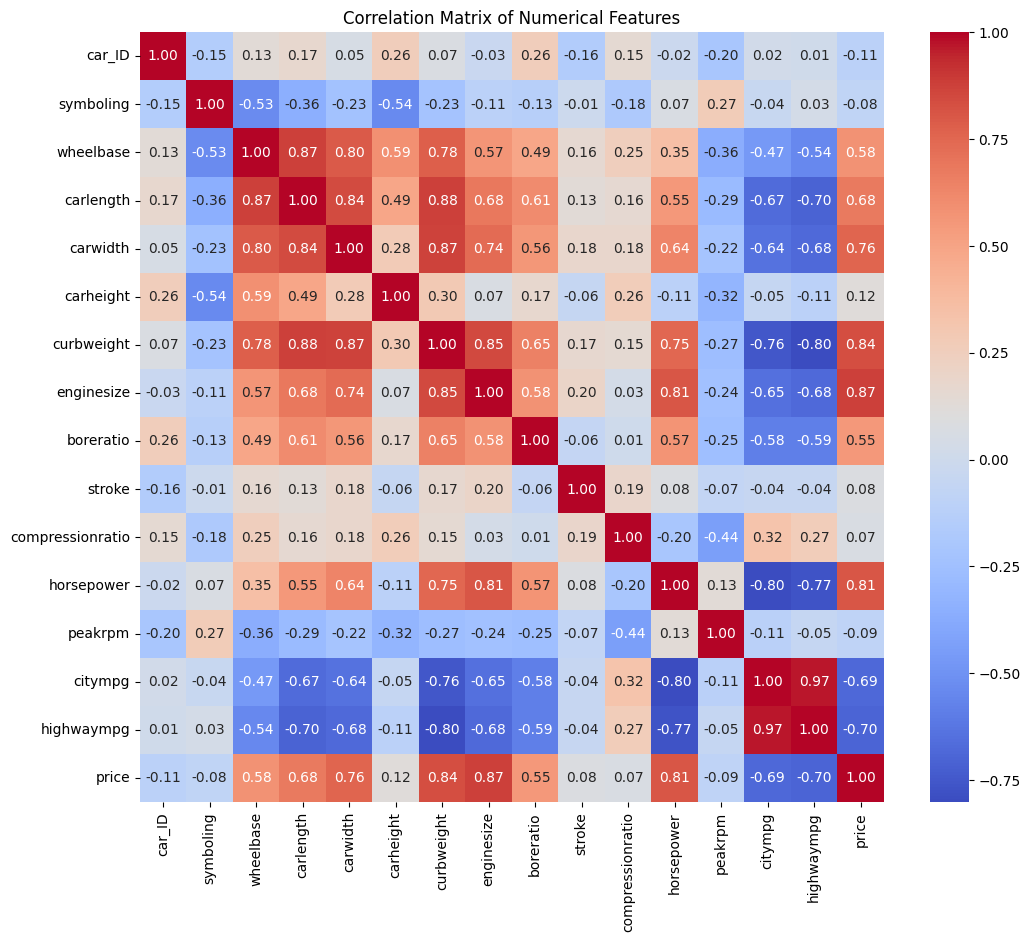

In [12]:
#heat map for correlation between different features only above numerccial features
import seaborn as sns
numerical_features = dataset.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [13]:
#segregate postive and moderate psotive and negative and negative correlation features
positive_corr = []
mode_pos_corr = []
negative_corr = []
mode_neg_corr = []
for i in range(len(x1[0])):
    if (isinstance(x1[0][i], int) or isinstance(x1[0][i], float)):
        corr = dataset.iloc[:, i].corr(dataset.iloc[:, 25])
        if corr > 0.5:
            positive_corr.append((dataset.columns[i], corr))
        elif 0 < corr <= 0.5:
            mode_pos_corr.append((dataset.columns[i], corr))
        elif corr < -0.5:
            negative_corr.append((dataset.columns[i], corr))
        elif -0.5 <= corr < 0:
            mode_neg_corr.append((dataset.columns[i], corr))
print("columnn names all co relations")
print("Positive Correlation (> 0.5):", positive_corr)
print("Moderate Positive Correlation (0 to 0.5):", mode_pos_corr)
print("Negative Correlation (< -0.5):", negative_corr)
print("Moderate Negative Correlation (-0.5 to 0):", mode_neg_corr)


columnn names all co relations
Positive Correlation (> 0.5): [('wheelbase', np.float64(0.5778155982921496)), ('carlength', np.float64(0.6829200156779629)), ('carwidth', np.float64(0.7593252997415118)), ('curbweight', np.float64(0.8353048793372965)), ('enginesize', np.float64(0.8741448025245112)), ('boreratio', np.float64(0.5531732367984434)), ('horsepower', np.float64(0.8081388225362212)), ('price', np.float64(1.0))]
Moderate Positive Correlation (0 to 0.5): [('carheight', np.float64(0.11933622657049436)), ('stroke', np.float64(0.079443083881931)), ('compressionratio', np.float64(0.06798350579944265))]
Negative Correlation (< -0.5): [('citympg', np.float64(-0.6857513360270401)), ('highwaympg', np.float64(-0.6975990916465566))]
Moderate Negative Correlation (-0.5 to 0): [('car_ID', np.float64(-0.10909333948229955)), ('symboling', np.float64(-0.07997822464270347)), ('peakrpm', np.float64(-0.08526715027785685))]


In [14]:
#print all category and is it moderate pos or pos mode neg or neg
corr_with_target = []
for i in range(len(x1[0])):
    if (isinstance(x1[0][i], int) or isinstance(x1[0][i], float)):
        corr = dataset.iloc[:, i].corr(dataset.iloc[:, 25])
        corr_with_target.append((dataset.columns[i], corr))
        if corr > 0.5:
            print(f"{dataset.columns[i]}: Positive Correlation ({corr})")
        elif 0 < corr <= 0.5:
            print(f"{dataset.columns[i]}: Moderate Positive Correlation ({corr})")
        elif corr < -0.5:
            print(f"{dataset.columns[i]}: Negative Correlation ({corr})")
        elif -0.5 <= corr < 0:
            print(f"{dataset.columns[i]}: Moderate Negative Correlation ({corr})")


car_ID: Moderate Negative Correlation (-0.10909333948229955)
symboling: Moderate Negative Correlation (-0.07997822464270347)
wheelbase: Positive Correlation (0.5778155982921496)
carlength: Positive Correlation (0.6829200156779629)
carwidth: Positive Correlation (0.7593252997415118)
carheight: Moderate Positive Correlation (0.11933622657049436)
curbweight: Positive Correlation (0.8353048793372965)
enginesize: Positive Correlation (0.8741448025245112)
boreratio: Positive Correlation (0.5531732367984434)
stroke: Moderate Positive Correlation (0.079443083881931)
compressionratio: Moderate Positive Correlation (0.06798350579944265)
horsepower: Positive Correlation (0.8081388225362212)
peakrpm: Moderate Negative Correlation (-0.08526715027785685)
citympg: Negative Correlation (-0.6857513360270401)
highwaympg: Negative Correlation (-0.6975990916465566)
price: Positive Correlation (1.0)


In [15]:
#columns that are very less corelation like between -0.1 to 0.1
less_corr_with_target = []
for i in range(len(x1[0])):
    if (isinstance(x1[0][i], int) or isinstance(x1[0][i], float)):
        corr = dataset.iloc[:, i].corr(dataset.iloc[:, 25])
        if -0.1 < corr < 0.1:
            less_corr_with_target.append((dataset.columns[i], corr))
            print(f"{dataset.columns[i]}: Very Less Correlation ({corr})")

symboling: Very Less Correlation (-0.07997822464270347)
stroke: Very Less Correlation (0.079443083881931)
compressionratio: Very Less Correlation (0.06798350579944265)
peakrpm: Very Less Correlation (-0.08526715027785685)


## we can remove those above vaiables to predict the price better or else better optimal modal

In [16]:
#x=df.drop(columns=['price'])

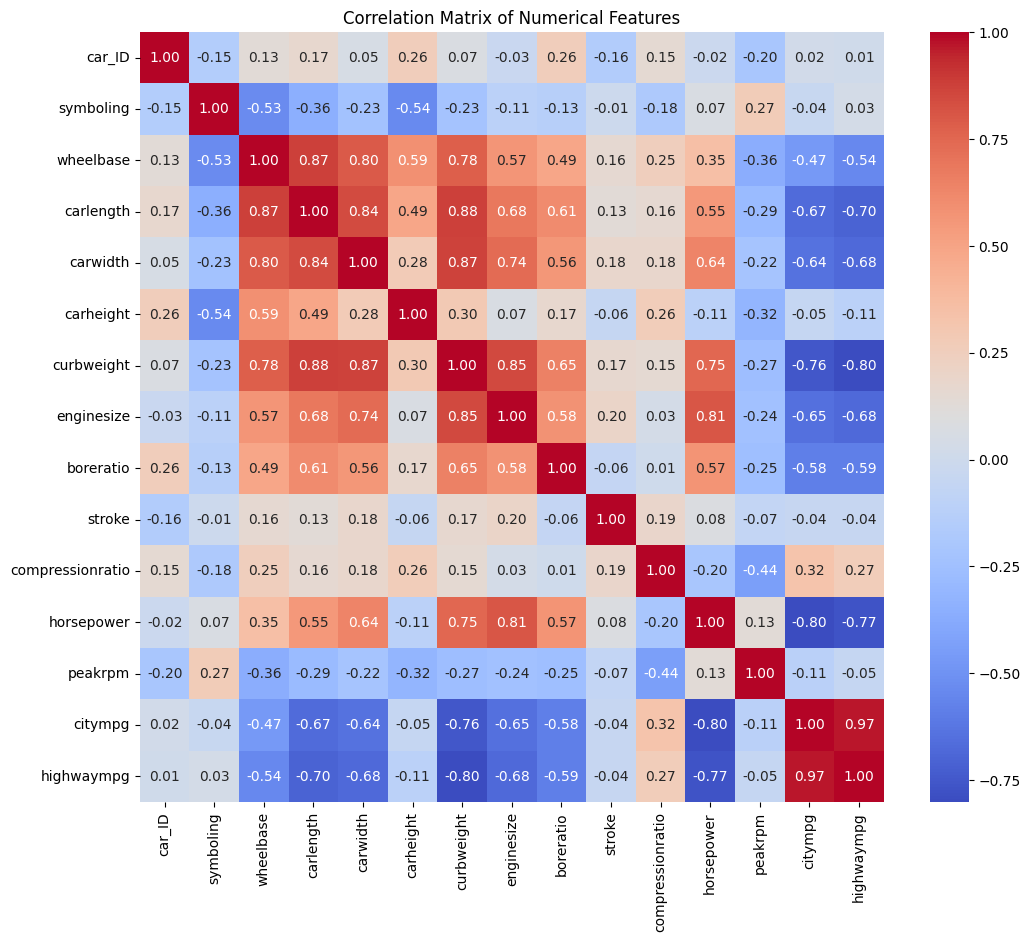

In [17]:
#heat map for correlation between different features only above numerccial features with no target variable
import seaborn as sns
numerical_features = dataset.select_dtypes(include=[np.number])
input_f = numerical_features.drop(columns=['price'])
corr_matrix = input_f.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [18]:
#find greater than 0.75 in input_f features
high_corr_pairs = []
for i in range(len(input_f.columns)):
    for j in range(i+1, len(input_f.columns)):
        corr = input_f.iloc[:, i].corr(input_f.iloc[:, j])
        if corr > 0.75 or corr < -0.75:
            high_corr_pairs.append((input_f.columns[i], input_f.columns[j], corr))
            print(f" {input_f.columns[i]} and {input_f.columns[j]}: {corr}")
len(high_corr_pairs)

 wheelbase and carlength: 0.874587475964263
 wheelbase and carwidth: 0.7951436436169687
 wheelbase and curbweight: 0.7763863277822101
 carlength and carwidth: 0.841118268481846
 carlength and curbweight: 0.8777284608306428
 carwidth and curbweight: 0.8670324646791232
 curbweight and enginesize: 0.8505940734262771
 curbweight and horsepower: 0.7507392514434812
 curbweight and citympg: -0.7574137845056008
 curbweight and highwaympg: -0.7974647922811804
 enginesize and horsepower: 0.8097686545377303
 horsepower and citympg: -0.8014561756662699
 horsepower and highwaympg: -0.7705438913729598
 citympg and highwaympg: 0.9713370423425061


14

In [19]:
all_cols = []
for i in high_corr_pairs:
    all_cols.append(i[0])
    all_cols.append(i[1])
uni=set(all_cols)
print(uni)

{'wheelbase', 'curbweight', 'citympg', 'carwidth', 'horsepower', 'enginesize', 'carlength', 'highwaympg'}


In [20]:
#uni colums corr with target variable
for col in uni:
    corr = numerical_features[col].corr(numerical_features['price'])
    print(f"Correlation between {col} and Price: {corr}")

Correlation between wheelbase and Price: 0.5778155982921496
Correlation between curbweight and Price: 0.8353048793372965
Correlation between citympg and Price: -0.6857513360270401
Correlation between carwidth and Price: 0.7593252997415118
Correlation between horsepower and Price: 0.8081388225362212
Correlation between enginesize and Price: 0.8741448025245112
Correlation between carlength and Price: 0.6829200156779629
Correlation between highwaympg and Price: -0.6975990916465566


In [29]:
#remove highly corelated in featurs and low corelated with price
cols_to_remove = ['wheelbase','citympg','carlength']
dataset_reduced = numerical_features.drop(columns=cols_to_remove)




In [30]:
#now train model again with reduced dataset  usingn linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_reduced = dataset_reduced.drop(columns=['price'])
y_reduced = dataset_reduced['price']
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)
lin_reg_reduced = LinearRegression()
lin_reg_reduced.fit(X_train, y_train)
y_pred_reduced = lin_reg_reduced.predict(X_test)



y_pred_reduced_train= lin_reg_reduced.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score




In [31]:
#both r2 scores
r2_reduced_train = r2_score(y_train, y_pred_reduced_train)
r2_reduced_test = r2_score(y_test, y_pred_reduced)
print(f"R2 Score on Training Set (Reduced): {r2_reduced_train}")
print(f"R2 Score on Test Set (Reduced): {r2_reduced_test}")

R2 Score on Training Set (Reduced): 0.8610619783873401
R2 Score on Test Set (Reduced): 0.8600949143637233


In [34]:
#linear regression with all numrical features without removing any feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_full = numerical_features.drop(columns=['price'])
y_full = numerical_features['price']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
lin_reg_full = LinearRegression()
lin_reg_full.fit(X_train_full, y_train_full)
y_pred_full = lin_reg_full.predict(X_test_full)
y_pred_full_train= lin_reg_full.predict(X_train_full)
from sklearn.metrics import mean_squared_error, r2_score
#both r2 scores
r2_full_train = r2_score(y_train_full, y_pred_full_train)
r2_full_test = r2_score(y_test_full, y_pred_full)
print(f"R2 Score on Training Set (Full): {r2_full_train}")
print(f"R2 Score on Test Set (Full): {r2_full_test}")

R2 Score on Training Set (Full): 0.8651078895307076
R2 Score on Test Set (Full): 0.8516657126363216
